<a href="https://colab.research.google.com/github/TsangCahya/ds-project/blob/main/Lidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##📘 Data Dictionary: Gaji Pekerjaan pada AI, ML, Data Science and Big Data.

Source https://aijobs.net/

data diambil dalam format .csv dengan ukuran 6,7 MB


| Nama Kolom           | Deskripsi                                                                                          | Tipe Data     | Skala Data     | Nilai / Keterangan                                              |
|----------------------|--------------------------------------------------------------------------------------------------|---------------|----------------|----------------------------------------------------------------|
| work_year            | Tahun ketika gaji dibayarkan.                                                                     | Numerik       | Discrete, Interval | 2020, 2021, 2022, 2023, 2024, 2025                                         |
| experience_level     | Tingkat pengalaman dalam pekerjaan selama tahun tersebut.                                         | Kategorikal   | Ordinal        | EN (Entry-level), MI (Menengah), SE (Senior), EX (Eksekutif)  |
| employment_type      | Jenis pekerjaan atau kontrak kerja.                                                              | Kategorikal   | Nominal        | FT (Penuh waktu), PT (Paruh waktu), CT (Kontrak), FL (Freelance)|
| job_title            | Nama jabatan/posisi pekerjaan selama tahun tersebut.                                             | Kategorikal   | Nominal        | Contoh: Data Scientist, Machine Learning Engineer, dll.       |
| salary               | Jumlah total gaji kotor yang dibayarkan.                                                         | Numerik       | Kontinu, Rasio          | Angka (dalam satuan mata uang asli)                            |
| salary_currency      | Mata uang dari gaji yang dibayarkan (kode ISO 4217).                                             | Kategorikal   | Nominal        | Contoh: USD, EUR, GBP                                          |
| salary_in_usd        | Gaji yang telah dikonversi ke USD.                                                               | Numerik       | kotinu, Rasio          | Angka (dalam USD, sudah disesuaikan dengan nilai tukar rata-rata)|
| employee_residence   | Negara tempat tinggal utama karyawan selama tahun bekerja (kode ISO 3166).                        | Kategorikal   | Nominal        | Contoh: US, ID, IN, DE                                        |
| remote_ratio         | Persentase pekerjaan yang dilakukan secara jarak jauh (remote).                                  | Numerik       | Discrete, Interval       | 0 = Tidak remote, 50 = Hybrid, 100 = Sepenuhnya remote        |
| company_location     | Negara lokasi utama kantor/perusahaan tempat bekerja (kode ISO 3166).                            | Kategorikal   | Nominal        | Contoh: US, IN, CA, DE                                        |
| company_size         | Rata-rata jumlah karyawan di perusahaan selama tahun tersebut.                                   | Kategorikal   | Ordinal        | S (<50), M (50–250), L (>250)                                 |




## Pengambilan data


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [20]:
colors = ["#FF5733", "#33FFC7", "#FF33A8", "#33A8FF", "#FFCE33",
          "#33FF57", "#FF338E", "#337BFF", "#FF8E33", "#334DFF",
          "#B533FF", "#33FFCE", "#FF3333", "#33FF33", "#FF33FF"]

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/TsangCahya/ds-project/refs/heads/main/salaries.csv')

## Karakteristik data

### Mengecek bentuk data

In [22]:
df.shape

(121603, 11)

### Mengecek kolom pada data

In [23]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Informasi data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121603 entries, 0 to 121602
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           121603 non-null  int64 
 1   experience_level    121603 non-null  object
 2   employment_type     121603 non-null  object
 3   job_title           121603 non-null  object
 4   salary              121603 non-null  int64 
 5   salary_currency     121603 non-null  object
 6   salary_in_usd       121603 non-null  int64 
 7   employee_residence  121603 non-null  object
 8   remote_ratio        121603 non-null  int64 
 9   company_location    121603 non-null  object
 10  company_size        121603 non-null  object
dtypes: int64(4), object(7)
memory usage: 10.2+ MB


### Karakteristik data

In [25]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


Tidak ada missing value


In [26]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Machine Learning Engineer,200000,USD,200000,CA,100,CA,M
1,2025,SE,FT,Machine Learning Engineer,150000,USD,150000,CA,100,CA,M
2,2025,SE,FT,Machine Learning Engineer,315000,USD,315000,US,0,US,M
3,2025,SE,FT,Machine Learning Engineer,252000,USD,252000,US,0,US,M
4,2025,MI,FT,Machine Learning Specialist,158000,USD,158000,US,0,US,M


In [27]:
df.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,work_year,salary,salary_in_usd,remote_ratio
count,121603.000000,1.216030e+05,121603.000000,121603.000000
mean,2024.296802,1.623650e+05,157671.585742,20.976867
std,0.681649,2.065057e+05,74463.546140,40.635409
min,2020.000000,1.400000e+04,15000.000000,0.000000
10%,2024.000000,7.500000e+04,75000.000000,0.000000
25%,2024.000000,1.060000e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
90%,2025.000000,2.506000e+05,250200.000000,100.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


Range nilai data pada salary dalam usd bernilai  15000 – 800000

Range nilai data pada work_year berada pada rentang 2020 – 2025

### Terdiri dari apa saja pada atribut kategorikal Job Title

In [28]:
df["job_title"].nunique()

371

Ada 371  nilai berbeda dari atribut job_title

In [29]:
top_20_job_title = df["job_title"].value_counts()[:20]
top_20_job_title

,count
job_title,
Data Scientist,16319
Data Engineer,13878
Software Engineer,13598
Data Analyst,11396
Engineer,8418
Machine Learning Engineer,7801
Manager,5880
Analyst,3762
Research Scientist,3049


Berikut adalah 20 nilai dari job title dengan frekuensi tertinggi

## Statistik

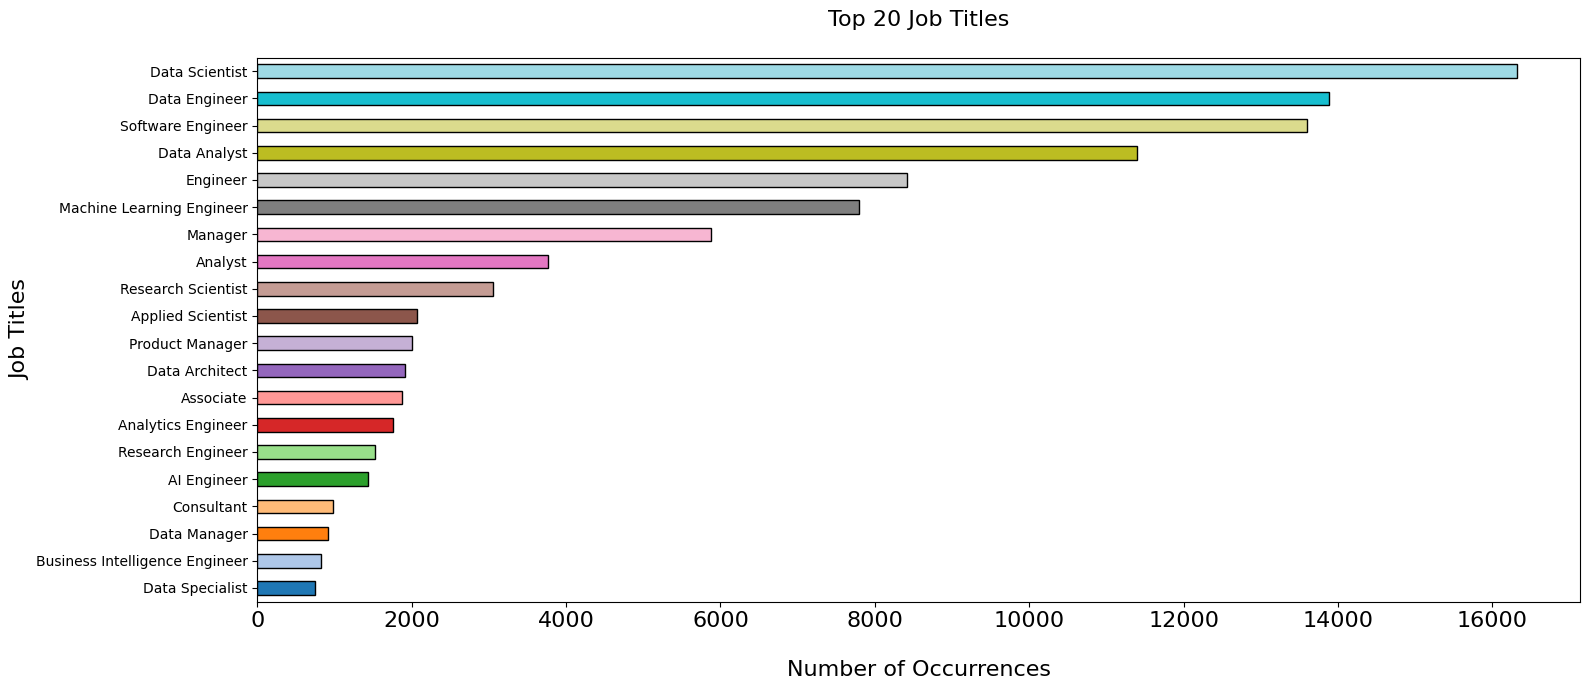

In [30]:
plt.figure(figsize = (16, 7))
top_20_job_title.sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Job Titles', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Top 20 Job Titles\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

### Insights

"Data Scientist" menempati posisi teratas dengan 16319 lowongan pekerjaan, men
egaskan kembali perannya sebagai pemimpin di bidang data science. Para data scientist sangat dicari karena keahlian mereka dalam analisis dan pemodelan data yang krusial untuk pengambilan keputusan berbasis data.

"Data Engineer" berada di posisi kedua dengan 13878 lowongan pekerjaan, menunjukkan permintaan yang sangat besar untuk profesional yang ahli dalam data engineering. Hal ini menekankan pentingnya peran infrastruktur data dalam organisasi modern.

"Software Engineer" dengan 13598 lowongan pekerjaan merupakan jabatan penting dalam ekosistem teknologi yang mendukung pengembangan perangkat lunak dan integrasi data. Posisi ini berkontribusi pada pembangunan alat dan sistem yang dibutuhkan untuk pengolahan data yang efisien.**bold text**

In [31]:
df.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,work_year,salary,salary_in_usd,remote_ratio
count,121603.000000,1.216030e+05,121603.000000,121603.000000
mean,2024.296802,1.623650e+05,157671.585742,20.976867
std,0.681649,2.065057e+05,74463.546140,40.635409
min,2020.000000,1.400000e+04,15000.000000,0.000000
10%,2024.000000,7.500000e+04,75000.000000,0.000000
25%,2024.000000,1.060000e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
90%,2025.000000,2.506000e+05,250200.000000,100.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


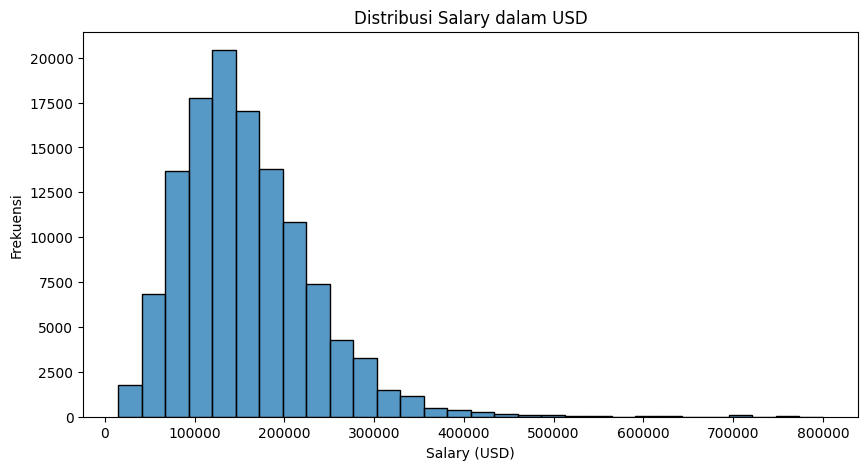

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=False)
plt.title('Distribusi Salary dalam USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frekuensi')
plt.show()

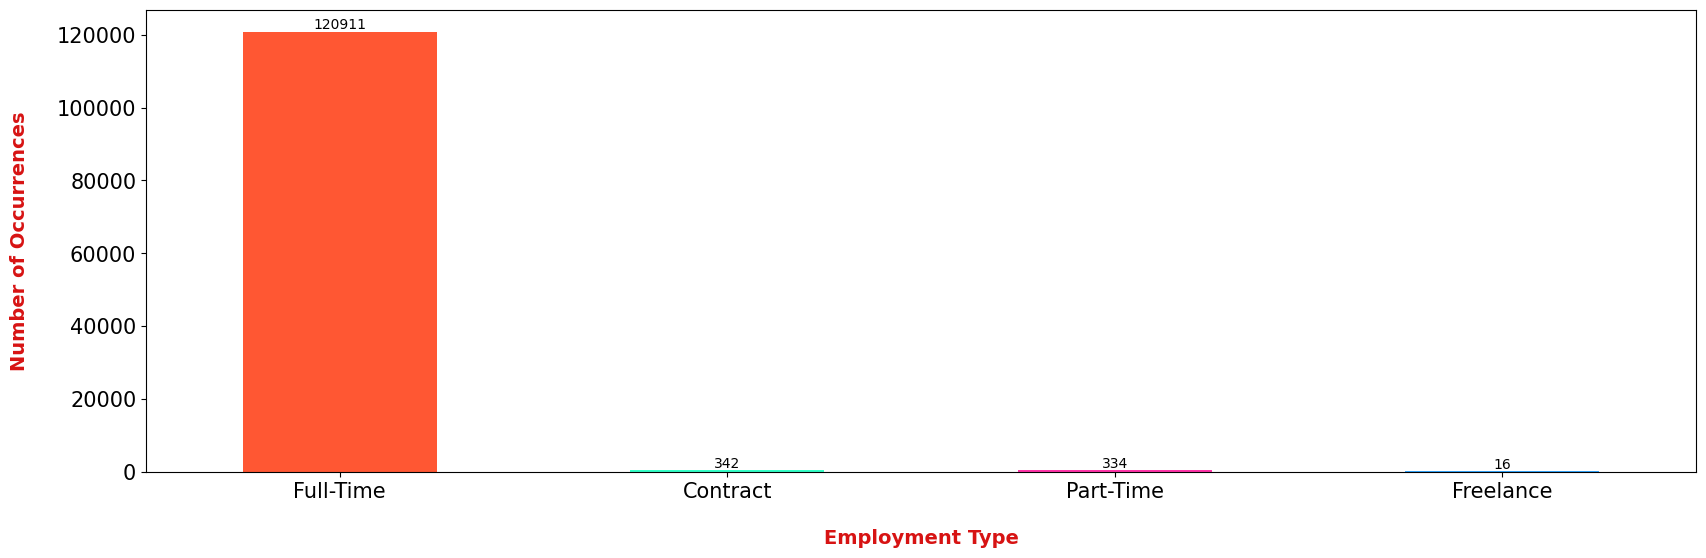

In [34]:
plt.figure(figsize = (20, 6))
ax = df["employment_type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Full-Time', 'Contract', 'Part-Time', 'Freelance'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

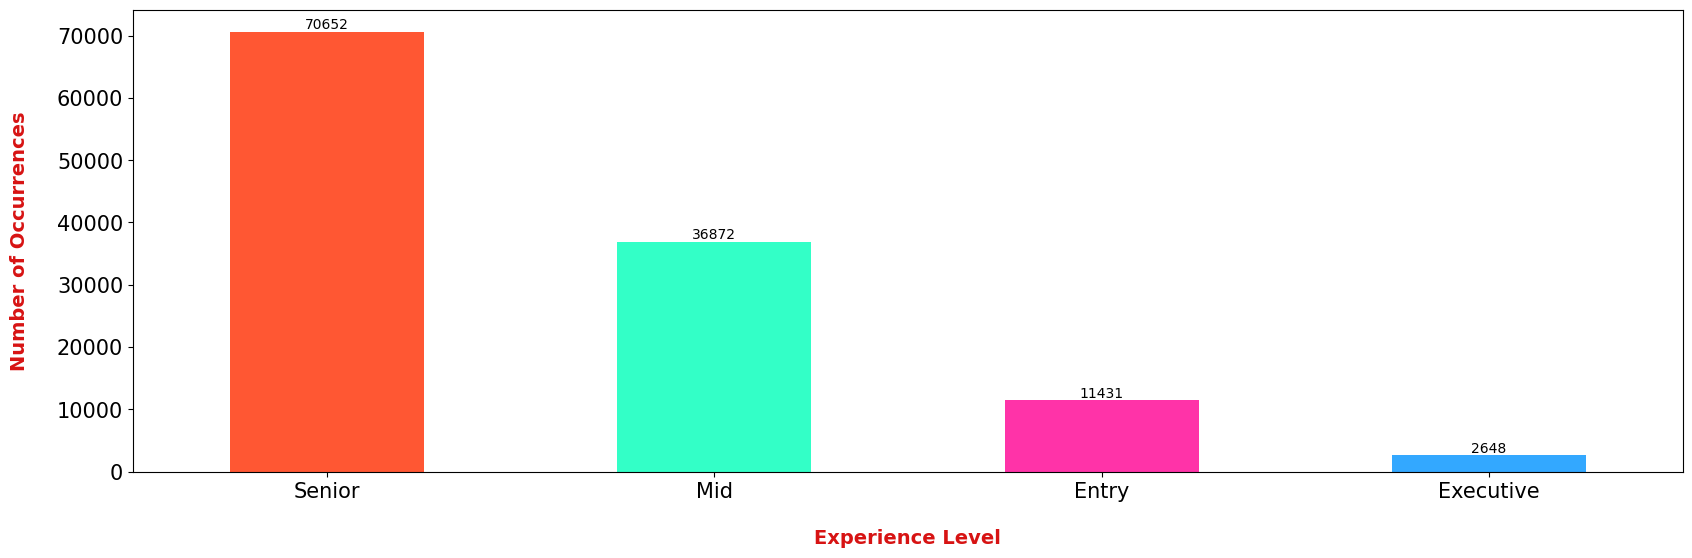

In [36]:
plt.figure(figsize = (20, 6))
ax = df["experience_level"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Senior', 'Mid', 'Entry', 'Executive'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Experience Level', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

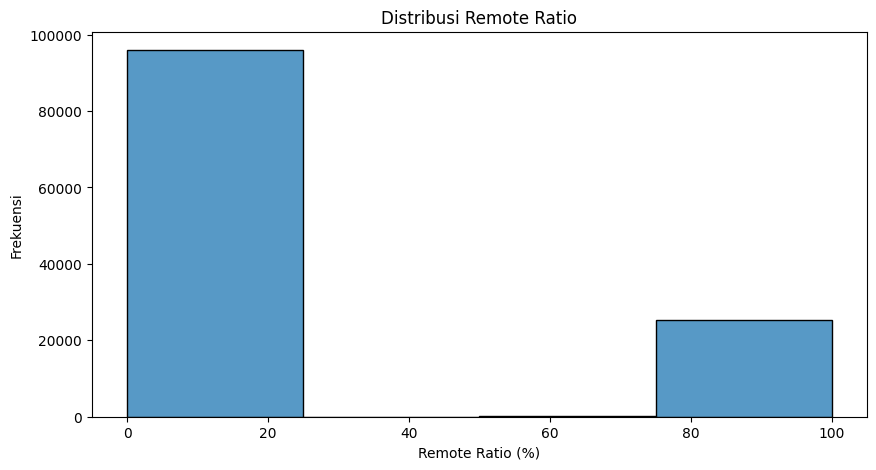

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(df['remote_ratio'], bins=4, kde=False)
plt.title('Distribusi Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Frekuensi')
plt.show()

### 📊 Insight Statistik Data Gaji

### 🗓️ Tahun (`work_year`)
- Mayoritas data berasal dari tahun **2024**, dengan kuartil atas (75% dan 90%) sudah masuk ke **2025**.
- Ini menunjukkan bahwa dataset mencakup data **terbaru dan prediksi ke depan**.

---

### 💵 Gaji dalam USD (`salary_in_usd`)
- **Rata-rata (mean):** \$157.672
- **Median (50%):** \$146.100 → menunjukkan distribusi sedikit **skewed ke kanan** (positif), karena ada outlier gaji tinggi.
- **Rentang gaji:**
  - Minimum: \$15.000
  - Maksimum: \$800.000 😲
- 📌 Artinya: Terdapat **ketimpangan distribusi gaji**, dengan sebagian kecil pekerjaan berpenghasilan sangat tinggi.

#### 📈 Distribusi Gaji per Persentil:
| Persentil | Gaji (USD) |
|-----------|------------|
| 10%       | 75.000     |
| 25%       | 106.000    |
| 50%       | 146.100    |
| 75%       | 198.000    |
| 90%       | 250.200    |

> 🔍 Sekitar 25% pekerja bergaji di bawah \$106.000 dan 25% lainnya bergaji di atas \$198.000.

---

### 🏠 Tingkat Kerja Jarak Jauh (`remote_ratio`)
- **Median (50%) = 0%** → artinya sebagian besar pekerjaan **bukan remote**.
- Namun, **90% tertinggi mencapai 100% remote**, yang berarti:
  - Sebagian besar tetap onsite/hybrid.
  - Tapi ada **peluang besar** untuk pekerjaan **sepenuhnya remote**, terutama untuk posisi elite.

---

### 🧾 Ringkasan Insight Utama:

| Topik             | Insight Singkat                                                                 |
|-------------------|----------------------------------------------------------------------------------|
| **Tahun**         | Mayoritas data tahun 2024, sebagian masuk 2025.                                 |
| **Gaji**          | Ketimpangan distribusi: ada gap besar antar kuartil.                            |
| **Outlier Gaji**  | Ada pekerjaan dengan gaji hingga \$800.000.                                     |
| **Remote Work**   | Mayoritas belum remote, tapi 10% pekerjaan bersifat 100% remote.                |

---
